In [1]:
import h5py    
import numpy as np 
import matplotlib.pyplot as plt
from pyjet import cluster,DTYPE_PTEPM
import pandas as pd

In [2]:
f = pd.read_hdf('../h5files/events_anomalydetection.h5', stop=10000) #read only first 'stop' events

In [3]:
events_combined = f.T

In [4]:
np.shape(events_combined)


(2101, 10000)

In [36]:
#Now, let's cluster some jets more efficiently!
all_largeRjets = {}
all_smallRjets = {}
for mytype in ['background','signal']:
    all_largeRjets[mytype]=[]
    all_smallRjets[mytype]=[]
    
    for ievt in range(2): #len(events_combined)):
        if ievt%10000==0:
            print(mytype,i)
        issignal = events_combined[ievt][2100]
        if (mytype=='background' and issignal):
            continue
        elif (mytype=='signal' and issignal==0):
            continue
        pseudojets_input = np.zeros(len([x for x in events_combined[ievt][::3] if x > 0]), dtype=DTYPE_PTEPM)
        events_filled = events_combined[ievt][:np.shape(pseudojets_input)[0]*3].values.reshape(np.shape(pseudojets_input)[0], 3)

        pseudojets_input['pT'] = events_filled[:, 0]
        pseudojets_input['eta'] = events_filled[:, 1]
        pseudojets_input['phi'] = events_filled[:, 2]
        largeR = cluster(pseudojets_input, R=1.0, p=-1)
        largeRjets = largeR.inclusive_jets(ptmin=20)
        smallR = cluster(pseudojets_input, R=0.4, p=-1)
        smallRjets = smallR.inclusive_jets(ptmin=20)

        all_largeRjets[mytype] += [largeRjets]
        all_smallRjets[mytype] += [smallRjets]



background 1
signal 1
208
          0         1         2           3         4         5         6     \
0     0.324101  0.646304  0.325172    0.290918  0.526330  0.307490  0.305228   
1    -0.361158 -0.539460 -0.833948   -2.200063 -2.349110 -1.999438 -1.949587   
2     2.737669 -1.386258  2.404844    1.630132 -1.745532  2.590663 -2.294166   
3     0.409859  0.471293  1.295058    0.565028  0.542491  0.296564  0.611917   
4    -2.429939 -1.636572 -2.089618   -1.714345 -2.080352 -2.257138 -1.139748   
5     0.729830  0.751657 -1.873342   -2.617103 -3.044045  2.921109  1.495378   
6     0.867922  0.453769  0.451272    0.951042  0.390727  0.487133  0.527820   
7    -2.267777 -1.099593 -0.101877   -0.532720 -1.278563 -2.188060 -2.143983   
8    -1.161310 -0.393405  2.217348    2.941473 -2.131058  3.039020  1.894717   
9     0.383031  0.485929  0.461293    0.896248  2.530358  0.347837  0.307497   
10   -1.204714 -1.034489 -0.028984   -0.090743 -2.124421 -0.882748 -0.915048   
11    0.692571

In [31]:
def getJet(alljets, index):
    jet = {}
    for mytype in ['background','signal']:
        jet[mytype]={'pt':[], 'eta':[], 'phi':[]}
        for ievt in range(len(all_largeRjets[mytype])):
            jet[mytype]['pt'] += [alljets[mytype][ievt][index].pt]
            jet[mytype]['eta'] += [alljets[mytype][ievt][index].eta]
            jet[mytype]['phi'] += [alljets[mytype][ievt][index].phi]
    return jet

lead_largeRjets, sublead_largeRjets = getJet(all_largeRjets, 0), getJet(all_largeRjets, 1)
lead_smallRjets, sublead_smallRjets = getJet(all_smallRjets, 0), getJet(all_smallRjets, 1)
print(lead_largeRjets)
print(sublead_largeRjets)
print(lead_smallRjets)
print(sublead_smallRjets)


{'background': {'pt': [1286.7276854490954, 1354.3940698848066], 'eta': [0.18550794794312087, 0.8265051414289109], 'phi': [-2.763675891801303, 1.365523633651283]}, 'signal': {'pt': [], 'eta': [], 'phi': []}}
{'background': {'pt': [1283.2207326902046, 1325.6137608136994], 'eta': [0.06498900849564969, -0.8743185375384193], 'phi': [0.39368816771965853, -1.786248193195]}, 'signal': {'pt': [], 'eta': [], 'phi': []}}
{'background': {'pt': [1279.906610860791, 954.404333031428], 'eta': [0.06585384358803455, -0.9045016823841067], 'phi': [0.39442750034110124, -1.973366094601893]}, 'signal': {'pt': [], 'eta': [], 'phi': []}}
{'background': {'pt': [1265.8894929390256, 558.7461496692064], 'eta': [0.18690467863515517, 1.150571770185542], 'phi': [-2.771421118698681, 1.125129335842131]}, 'signal': {'pt': [], 'eta': [], 'phi': []}}


208


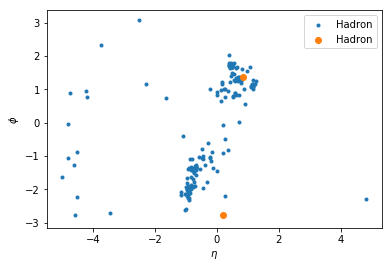

In [54]:
#Let's make some very simple plots.
def plothadron():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    n,b,p = plt.hist(pseudojets_input['eta'], bins=50, facecolor='r', alpha=0.2,label='background')
    plt.xlabel(r'$\eta$')
    plt.ylabel('Number of hadrons')
    plt.legend(loc='upper right')

def plothadron2d():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
#     plt.hist2d(x=pseudojets_input['eta'], y=pseudojets_input['phi'], bins=50, facecolor='r', label='background')
    plt.scatter(x=pseudojets_input['eta'], y=pseudojets_input['phi'], marker='.', label='Hadron')
    plt.scatter(x=lead_largeRjets['background']['eta'], y=lead_largeRjets['background']['phi'], marker='o', label='Hadron')
    plt.xlabel(r'$\eta$')
    plt.ylabel(r'$\phi$')
    plt.legend(loc='upper right')
    
plothadron2d()
print(len(pseudojets_input))

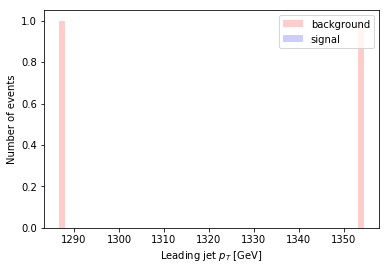

In [26]:
#Let's make some very simple plots.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n,b,p = plt.hist(leadpT_largeRjets['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(leadpT_largeRjets['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
plt.xlabel(r'Leading jet $p_{T}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.savefig("leadjetpt.pdf")

In [12]:
mjj={}
for mytype in ['background','signal']:
    mjj[mytype]=[]
    for k in range(len(all_largeRjets[mytype])):
        E = all_largeRjets[mytype][k][0].e+all_largeRjets[mytype][k][1].e
        px = all_largeRjets[mytype][k][0].px+all_largeRjets[mytype][k][1].px
        py = all_largeRjets[mytype][k][0].py+all_largeRjets[mytype][k][1].py
        pz = all_largeRjets[mytype][k][0].pz+all_largeRjets[mytype][k][1].pz
        mjj[mytype]+=[(E**2-px**2-py**2-pz**2)**0.5]


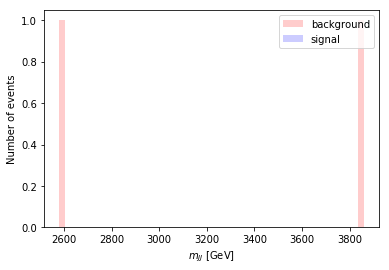

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n,b,p = plt.hist(mjj['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(mjj['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
plt.xlabel(r'$m_{JJ}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.savefig("mjj.pdf")